In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [4]:
df = pd.read_csv("data/cal_housing_clean.csv")

In [5]:
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
df.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/Users/jet/anaconda/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


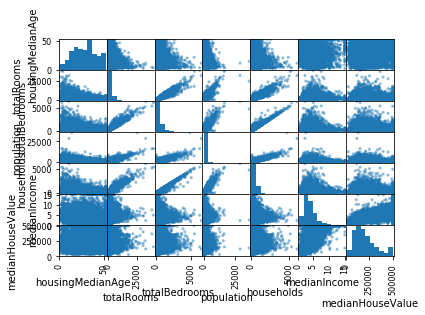

In [12]:
scatter_matrix(df)
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler().fit(df)

In [20]:
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [21]:
df_scaled.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638


/Users/jet/anaconda/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


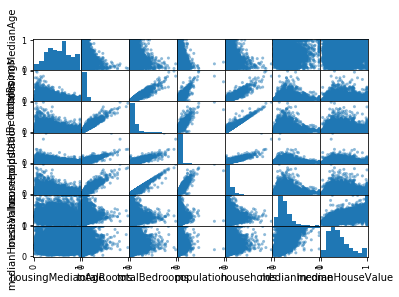

In [24]:
scatter_matrix(df_scaled)
plt.show()

# Regression

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_scaled[x_cols], df[y_col],train_size=0.7)

In [46]:
y_col = 'medianHouseValue'
x_cols = ['housingMedianAge',  'population', 'totalRooms', 'totalBedrooms','households','medianIncome']

feat_cols = []

for i in x_cols:
    feat_cols.append(tf.feature_column.numeric_column(i))

In [47]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmp8008miw0', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [48]:
# Training
input_train = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train,batch_size=100,num_epochs=100, shuffle=False)

In [49]:
train_metrics = estimator.train(input_fn=input_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmp8008miw0/model.ckpt.
INFO:tensorflow:loss = 5.49695e+12, step = 1
INFO:tensorflow:global_step/sec: 478.874
INFO:tensorflow:loss = 5.20463e+12, step = 101 (0.210 sec)
INFO:tensorflow:global_step/sec: 478.641
INFO:tensorflow:loss = 5.34645e+12, step = 201 (0.209 sec)
INFO:tensorflow:global_step/sec: 445.845
INFO:tensorflow:loss = 5.53465e+12, step = 301 (0.224 sec)
INFO:tensorflow:global_step/sec: 479.57
INFO:tensorflow:loss = 7.001e+12, step = 401 (0.209 sec)
INFO:tensorflow:global_step/sec: 472.407
INFO:tensorflow:loss = 5.78342e+12, step = 501 (0.212 sec)
INFO:tensorflow:global_step/sec: 458.965
INFO:tensorflow:loss = 5.92868e+12, step = 601 (0.218 sec)
INFO:tensorflow:global_step/sec: 412.871
INFO:tensorflow:loss = 5.72539e+12, step = 701 (0.242 sec)
INFO:tensorflow:global_step/sec: 475.276
INFO:tensorflow:loss = 5.75095e+12, step = 801 (0.210 

INFO:tensorflow:loss = 5.93175e+12, step = 8001 (0.219 sec)
INFO:tensorflow:global_step/sec: 400.306
INFO:tensorflow:loss = 6.81722e+12, step = 8101 (0.250 sec)
INFO:tensorflow:global_step/sec: 499.73
INFO:tensorflow:loss = 5.99468e+12, step = 8201 (0.199 sec)
INFO:tensorflow:global_step/sec: 478.03
INFO:tensorflow:loss = 4.78741e+12, step = 8301 (0.209 sec)
INFO:tensorflow:global_step/sec: 492.02
INFO:tensorflow:loss = 5.69303e+12, step = 8401 (0.203 sec)
INFO:tensorflow:global_step/sec: 461.06
INFO:tensorflow:loss = 4.66123e+12, step = 8501 (0.217 sec)
INFO:tensorflow:global_step/sec: 440.941
INFO:tensorflow:loss = 5.94151e+12, step = 8601 (0.227 sec)
INFO:tensorflow:global_step/sec: 496.071
INFO:tensorflow:loss = 5.52477e+12, step = 8701 (0.202 sec)
INFO:tensorflow:global_step/sec: 465.29
INFO:tensorflow:loss = 6.00733e+12, step = 8801 (0.215 sec)
INFO:tensorflow:global_step/sec: 451.559
INFO:tensorflow:loss = 5.38208e+12, step = 8901 (0.221 sec)
INFO:tensorflow:global_step/sec: 474

In [53]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=100, num_epochs=100, shuffle=False)

In [54]:
results = estimator.evaluate(eval_input_fn)

INFO:tensorflow:Starting evaluation at 2018-01-02-10:17:35
INFO:tensorflow:Restoring parameters from /var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmp8008miw0/model.ckpt-14447
INFO:tensorflow:Finished evaluation at 2018-01-02-10:17:43
INFO:tensorflow:Saving dict for global step 14447: average_loss = 5.69972e+10, global_step = 14447, loss = 5.69972e+12


In [56]:
print(results)

{'average_loss': 5.6997224e+10, 'loss': 5.6997225e+12, 'global_step': 14447}


# Plot the test data

In [83]:
pred_input_fn = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=100,shuffle=False)

In [84]:
pred = estimator.predict(pred_input_fn)

In [85]:
predictions = [i['predictions'][0] for i in list(pred)]

INFO:tensorflow:Restoring parameters from /var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmp8008miw0/model.ckpt-14447


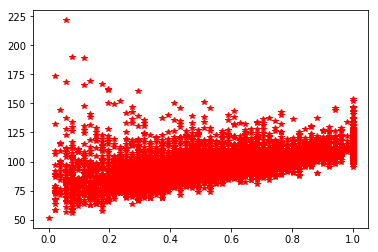

In [86]:
plt.plot(x_test.iloc[:,0].values,predictions,'r*')
plt.show()

In [82]:
len(predictions)

619300

# Using DNN

In [89]:
layers = len(x_cols)
estimator = tf.estimator.DNNRegressor(hidden_units=[layers,layers,layers], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmpdzw1q7ph', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [91]:
# Training
input_train = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train,batch_size=100,num_epochs=100, shuffle=False)
train = estimator.train(input_fn=input_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmpdzw1q7ph/model.ckpt.
INFO:tensorflow:loss = 5.49695e+12, step = 1
INFO:tensorflow:global_step/sec: 421.21
INFO:tensorflow:loss = 5.17648e+12, step = 101 (0.243 sec)
INFO:tensorflow:global_step/sec: 456.561
INFO:tensorflow:loss = 5.22664e+12, step = 201 (0.213 sec)
INFO:tensorflow:global_step/sec: 437.658
INFO:tensorflow:loss = 5.26181e+12, step = 301 (0.230 sec)
INFO:tensorflow:global_step/sec: 479.039
INFO:tensorflow:loss = 6.45146e+12, step = 401 (0.208 sec)
INFO:tensorflow:global_step/sec: 355.216
INFO:tensorflow:loss = 5.00481e+12, step = 501 (0.282 sec)
INFO:tensorflow:global_step/sec: 415.292
INFO:tensorflow:loss = 4.8103e+12, step = 601 (0.240 sec)
INFO:tensorflow:global_step/sec: 532.24
INFO:tensorflow:loss = 4.35476e+12, step = 701 (0.189 sec)
INFO:tensorflow:global_step/sec: 383.601
INFO:tensorflow:loss = 3.96132e+12, step = 801 (0.260 

INFO:tensorflow:loss = 1.18011e+12, step = 8001 (0.204 sec)
INFO:tensorflow:global_step/sec: 442.603
INFO:tensorflow:loss = 1.21511e+12, step = 8101 (0.226 sec)
INFO:tensorflow:global_step/sec: 671.849
INFO:tensorflow:loss = 1.00772e+12, step = 8201 (0.150 sec)
INFO:tensorflow:global_step/sec: 486.997
INFO:tensorflow:loss = 9.69086e+11, step = 8301 (0.205 sec)
INFO:tensorflow:global_step/sec: 483.197
INFO:tensorflow:loss = 9.12187e+11, step = 8401 (0.207 sec)
INFO:tensorflow:global_step/sec: 501.711
INFO:tensorflow:loss = 1.15517e+12, step = 8501 (0.199 sec)
INFO:tensorflow:global_step/sec: 463.52
INFO:tensorflow:loss = 1.01806e+12, step = 8601 (0.216 sec)
INFO:tensorflow:global_step/sec: 507.878
INFO:tensorflow:loss = 8.78022e+11, step = 8701 (0.197 sec)
INFO:tensorflow:global_step/sec: 495.473
INFO:tensorflow:loss = 1.2424e+12, step = 8801 (0.202 sec)
INFO:tensorflow:global_step/sec: 640.488
INFO:tensorflow:loss = 9.04307e+11, step = 8901 (0.157 sec)
INFO:tensorflow:global_step/sec: 

In [92]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test,batch_size=100, num_epochs=100,shuffle=False)
results=estimator.evaluate(input_fn=eval_input_fn)
print(results)

INFO:tensorflow:Starting evaluation at 2018-01-02-23:14:08
INFO:tensorflow:Restoring parameters from /var/folders/tx/ftbzjwns6fgg8d6cvfwrz6k40000gn/T/tmpdzw1q7ph/model.ckpt-14447
INFO:tensorflow:Finished evaluation at 2018-01-02-23:14:17
INFO:tensorflow:Saving dict for global step 14447: average_loss = 9.85055e+09, global_step = 14447, loss = 9.85055e+11
{'average_loss': 9.8505533e+09, 'loss': 9.850553e+11, 'global_step': 14447}
